In [1]:
import tfscreen 

from tfscreen.util import (
    read_dataframe,
)
from tfscreen.fitting import stats_test_suite
from tfscreen.analysis import counts_to_theta
from tfscreen.plot import (
    est_v_real_summary,
    err_vs_mag
)

import numpy as np



In [2]:

# simulated experimental output
combined_df = read_dataframe("tfscreen-walkthrough/output/demo-combined_df.csv")
sample_df = read_dataframe("tfscreen-walkthrough/output/demo-sample_df.csv",index_column="sample") 
calibration_data = "2025-08-27_calibration.json"

# ground truth data
phenotype_df = read_dataframe("tfscreen-walkthrough/output/demo-phenotype_df.csv")
genotype_df = read_dataframe("tfscreen-walkthrough/output/demo-genotype_df.csv")

theta_df, growth_df, pred_df, k_df, fit_out = counts_to_theta(combined_df=combined_df,
                                                              sample_df=sample_df,
                                                              calibration_data=calibration_data,
                                                              fit_method="mle",
                                                              max_block_size=250)


Renaming column 'Unnamed: 0' -> 'sample'


  0%|          | 0/842 [00:00<?, ?it/s]

### predicted counts versus observed

This shows the fit model recapitulates the experimental ln(cfu/mL). It is more accurate at higher values of ln(cfu/mL) than at lowre values. 

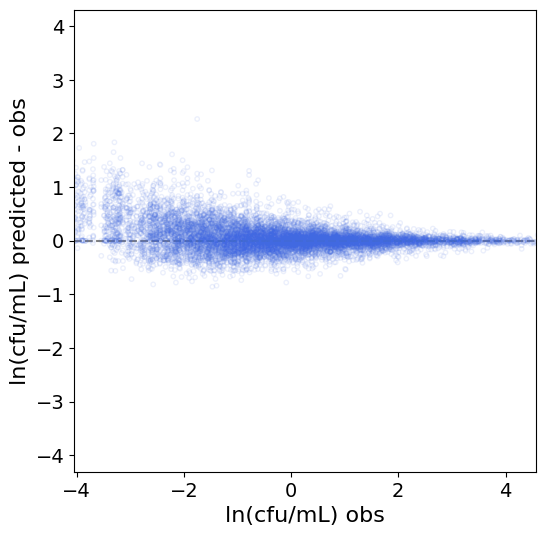

In [3]:
_ = err_vs_mag(pred_df["obs_est"].values,
               pred_df["pred_est"].values,
               axis_name="ln(cfu/mL)")


### theta estimates versus ground truth

This shows the model extracts theta values with relatively high accuracy ($R^{2} = 0.84$, RMSE = 0.14). More importantly, the uncertainties are well calibrated. The uncertainties are slightly lower than the true error. (86.25% of (estimated minus real values) fall within the predicted 95% confidence interval. 

{'pct_success': np.float64(1.0),
 'rmse': np.float64(0.14001089116814414),
 'normalized_rmse': np.float64(0.15940597644588905),
 'pearson_r': np.float64(0.9132625534380913),
 'r_squared': np.float64(0.8340484915122625),
 'mean_error': np.float64(-0.005541485183881554),
 'coverage_prob': np.float64(0.863329207920792),
 'residual_corr': np.float64(-0.19875309481168543),
 'residual_corr_p_value': np.float64(0.0),
 'bp_p_value': np.float64(3.9327188515704545e-22)}

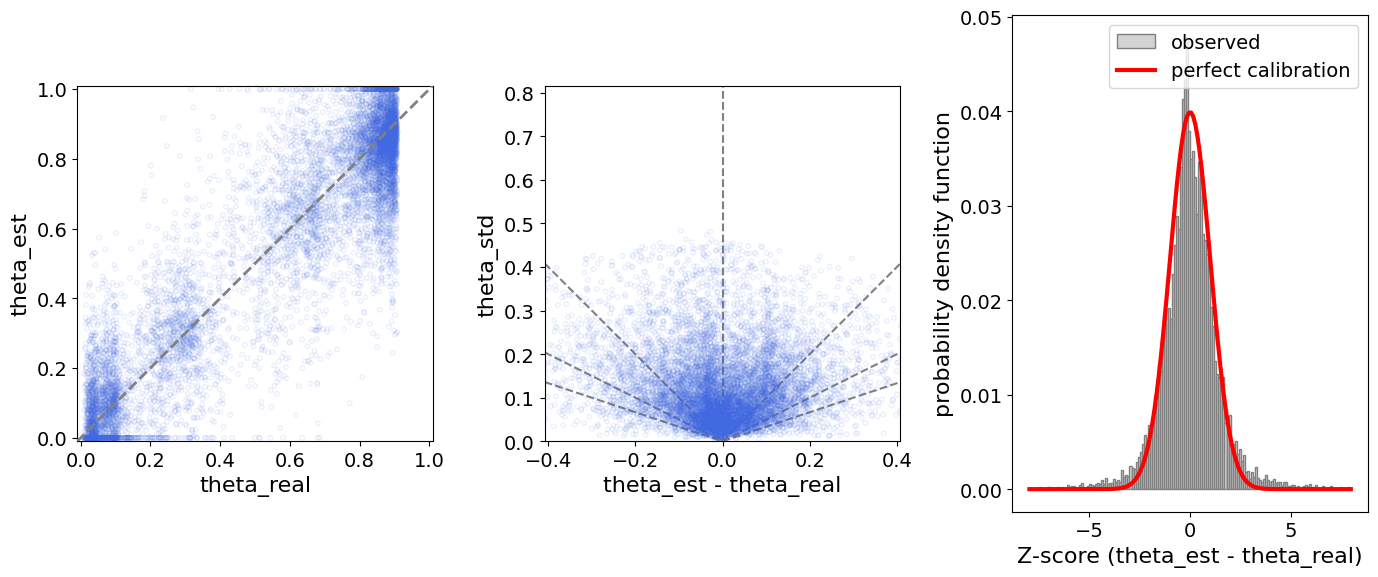

In [4]:
theta_real = phenotype_df[(phenotype_df["marker"] == "kanR") &
                          (phenotype_df["select"] == 1)]

_ = est_v_real_summary(theta_df["theta_est"],
                       theta_df["theta_std"],
                       theta_real["obs"],
                       axis_prefix="theta")

stats_test_suite(theta_df["theta_est"].values,
                 theta_df["theta_std"].values,
                 theta_real["obs"].values)

### shift in growth rate estimates versus ground truth

We do a poor job of estimating the global shift in growth rate for each mutant. 

{'pct_success': np.float64(1.0),
 'rmse': np.float64(0.005832076436029487),
 'normalized_rmse': np.float64(0.3000136035659411),
 'pearson_r': np.float64(0.028641315005526767),
 'r_squared': np.float64(0.0008203249252458128),
 'mean_error': np.float64(0.0011782576002112109),
 'coverage_prob': np.float64(0.35099009900990097),
 'residual_corr': np.float64(-0.8602758819754494),
 'residual_corr_p_value': np.float64(0.0),
 'bp_p_value': np.float64(0.0)}

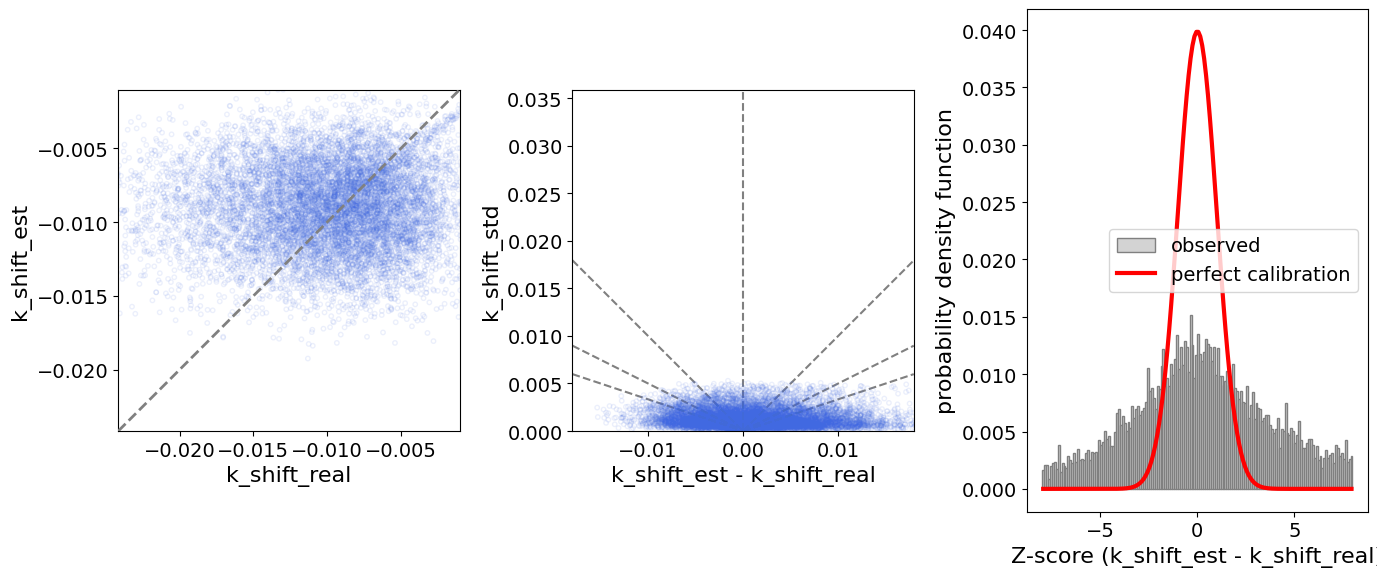

In [5]:
_ = tfscreen.plot.est_v_real_summary(growth_df["k_shift_est"].values,
                                     growth_df["k_shift_std"].values,
                                     genotype_df["k_shift"].values,
                                     axis_prefix="k_shift")

stats_test_suite(growth_df["k_shift_est"].values,
                 growth_df["k_shift_std"].values,
                 genotype_df["k_shift"].values)


### initial population estimates versus ground truth

We do a poor job estimating the initial populations of each mutant. 

/Users/harmsm/miniconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4750: RuntimeWarning: invalid value encountered in subtract
  xm = x - xmean
/Users/harmsm/miniconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4751: RuntimeWarning: invalid value encountered in subtract
  ym = y - ymean
/Users/harmsm/miniconda3/lib/python3.12/site-packages/tfscreen/fitting/stats_test_suite.py:123: UserWarning: het_breuschpagan test did not converge.

  warnings.warn("het_breuschpagan test did not converge.\n")


{'pct_success': np.float64(1.0),
 'rmse': np.float64(inf),
 'normalized_rmse': np.float64(inf),
 'pearson_r': np.float64(nan),
 'r_squared': np.float64(nan),
 'mean_error': np.float64(inf),
 'coverage_prob': np.float64(0.16504950495049506),
 'residual_corr': np.float64(nan),
 'residual_corr_p_value': np.float64(nan),
 'bp_p_value': nan}

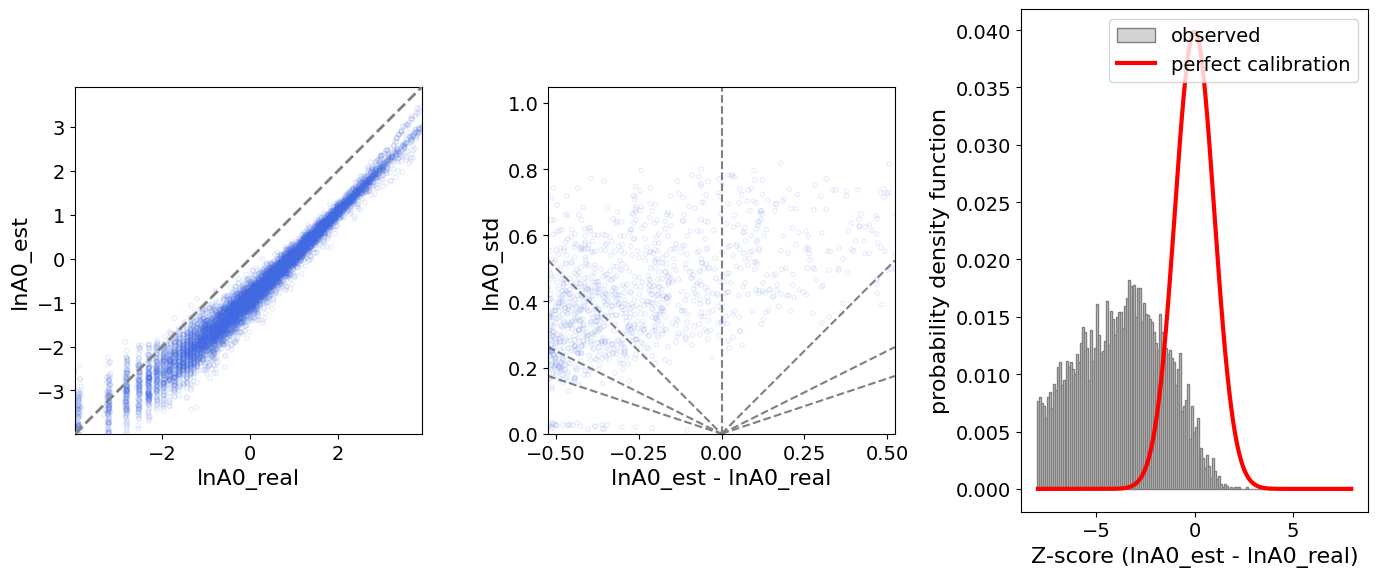

In [6]:
lnA0_df = k_df.groupby("lnA0_est",as_index=False).first()
lnA0_df.index = lnA0_df["genotype"]

real_df = genotype_df.copy()

real_df.index = real_df["genotype"]

lnA0_est = lnA0_df["lnA0_est"].values
lnA0_std = lnA0_df["lnA0_std"].values
lnA0_real = real_df.loc[lnA0_df["genotype"],"lnA0"].values

_ = est_v_real_summary(lnA0_est,
                       lnA0_std,
                       lnA0_real,
                       axis_prefix="lnA0")

stats_test_suite(lnA0_est,
                 lnA0_std,
                 lnA0_real)

### predicted growth rates versus ground truth

Because we cannot accurately estimate $k_{shift}$ and $ln(A_{0})$, do a relatively poor job capturing true growth rates. 

{'pct_success': np.float64(1.0),
 'rmse': np.float64(0.005907544062892939),
 'normalized_rmse': np.float64(0.1766173008658068),
 'pearson_r': np.float64(0.7408003995639423),
 'r_squared': np.float64(0.5487852319940966),
 'mean_error': np.float64(0.0011700191461811837),
 'coverage_prob': np.float64(0.38653465346534654),
 'residual_corr': np.float64(-0.5099634283429966),
 'residual_corr_p_value': np.float64(0.0),
 'bp_p_value': np.float64(0.0)}

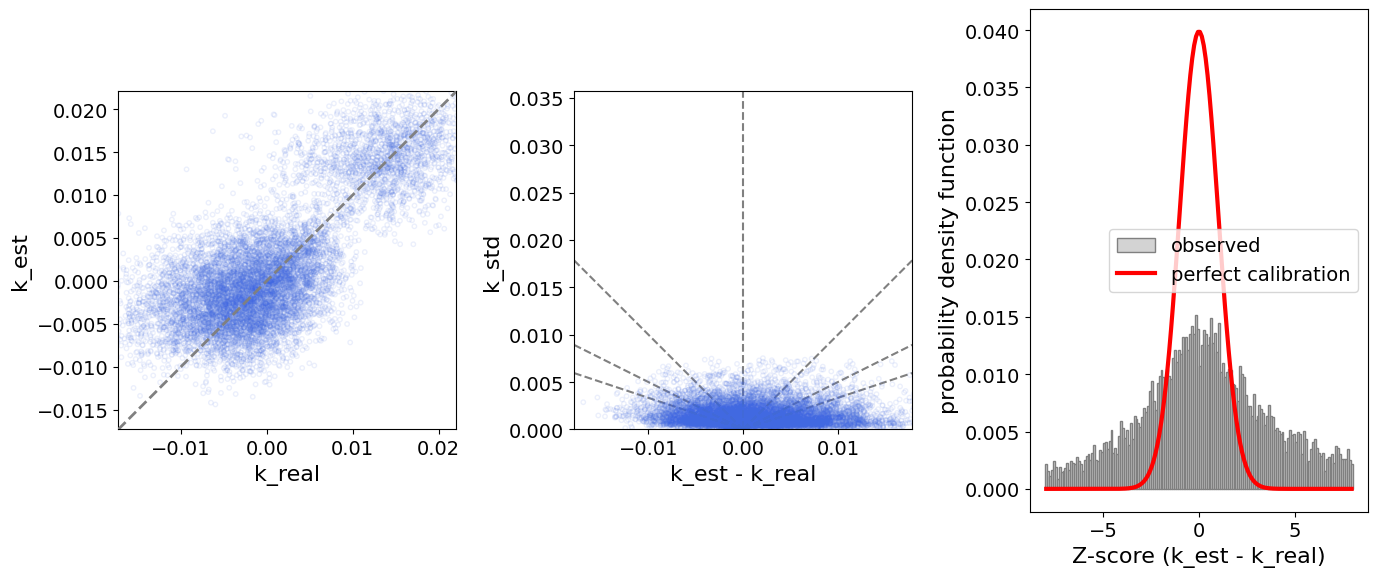

In [7]:
_ = est_v_real_summary(k_df["k_est"],
                       k_df["k_std"],
                       phenotype_df["overall_growth_rate"],
                       axis_prefix="k")

stats_test_suite(k_df["k_est"].values,
                 k_df["k_std"].values,
                 phenotype_df["overall_growth_rate"].values)

### fit parameter covariance

We can explain the accurate $\theta$ fits despite the the poor $k_{shift}$ and $ln(A_{0})$ fits based on the strong covariation in our estimates of these last two parameters. It's not that we know nothing about these values; rather, we know something about their sum but not individual values. 

This makes sense algebraically. We are fitting the following model:

$$ln(A) = ln(A_{0}) + k_{shift}(t_{pre} + t_{expt}) + \theta (t_{pre}m_{pre} + t_{expt}m_{expt}) + \epsilon$$

$t_{pre}$ and $t_{expt}$ are the pre-selection and post-selection growth times, $m_{pre}$ and $m_{expt}$ are calibrated slopes relating $\theta$ to growth rate shift ,and $\epsilon$ is the regression residual. 

If $k_{shift}$ is small, it will only vary weakly with time. This means we are effectively fitting:

$$ln(A) \approx \Big (ln(A_{0}) + k^{\prime}_{shift} \Big) + \theta (t_{pre}m_{pre} + t_{expt}m_{expt}) + \epsilon$$ 

where $k^{\prime}_{shift}$ is a time-independent constant. We can thus effectively pull out the *sum* of $ln(A_{0})$ and $k^{\prime}_{shift}$, but not their individual values. Further exacerbating the covariation, these values are fundamentally related. After transformation, the $k_{shift}$ of each genotype controls its growth rate, and thus $ln(A_{0})$. 

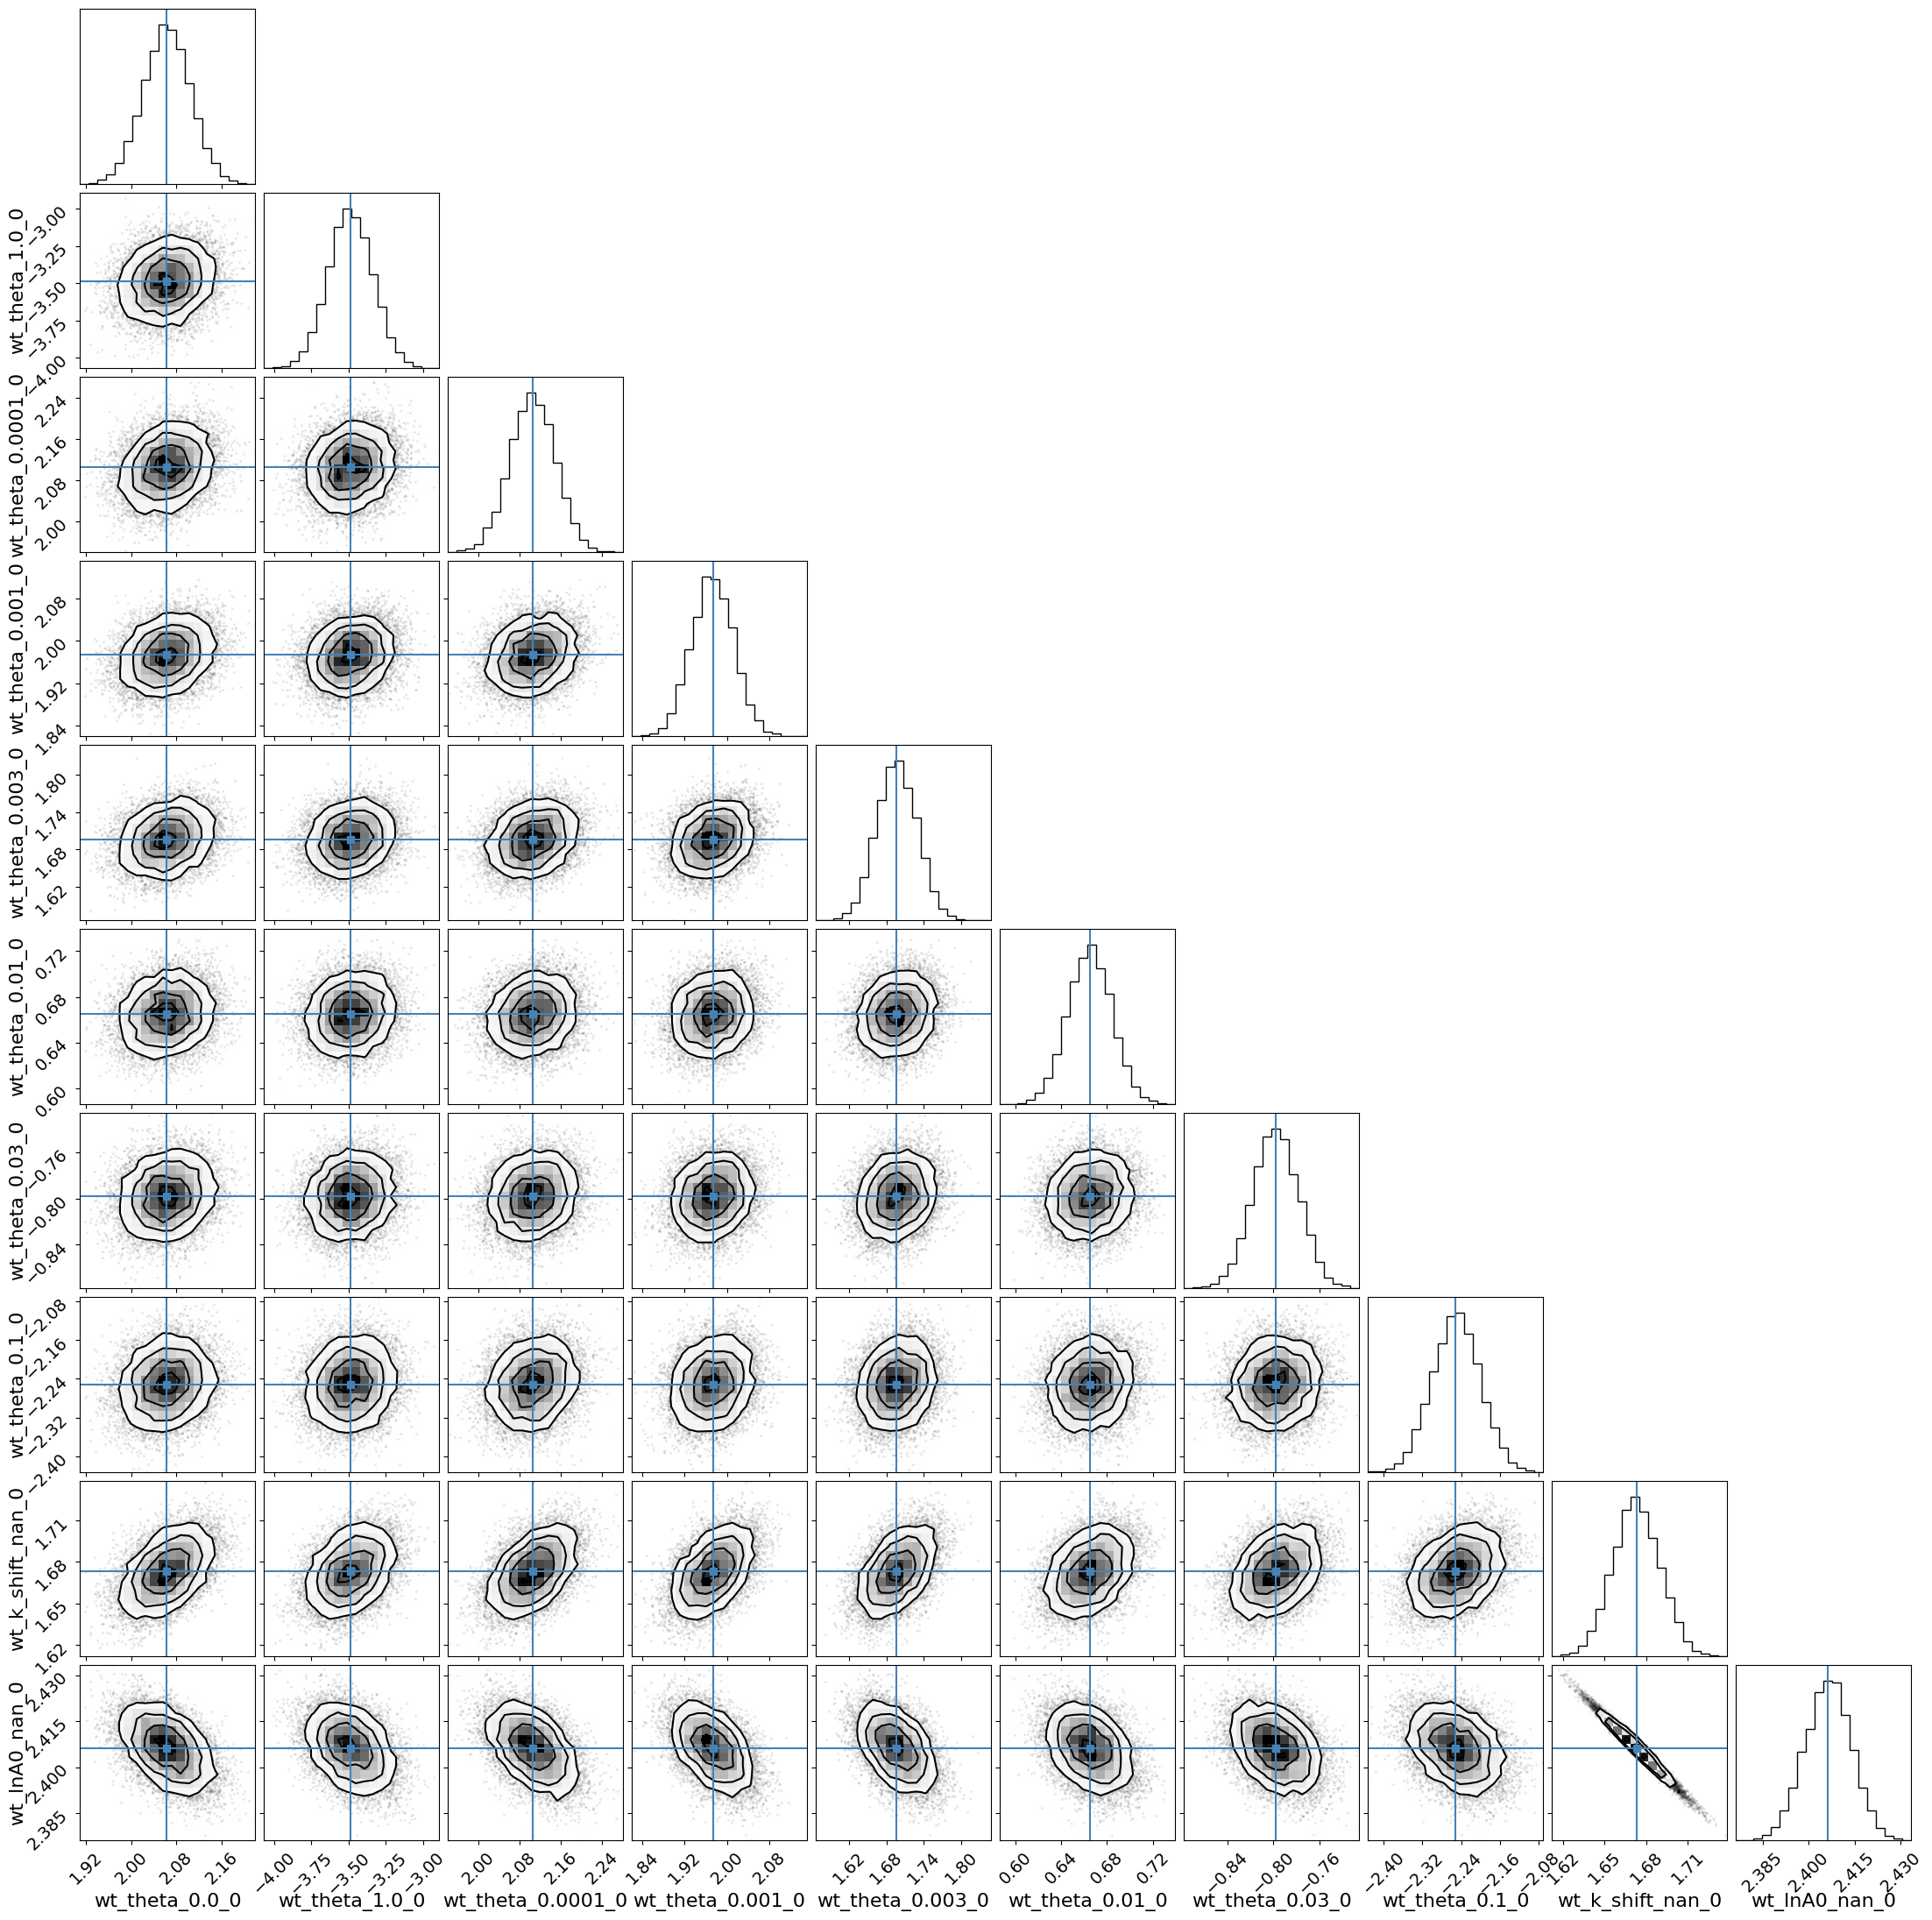

In [8]:
fit_df = fit_out["fit_df"]
cov_matrix = fit_out["cov_matrix"]
plot_mask = fit_df["genotype"] == "wt"

fig = tfscreen.plot.corner_plot(fit_df,
                          cov_matrix,
                          plot_mask)